In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_degeneracy_new_batching/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_111'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

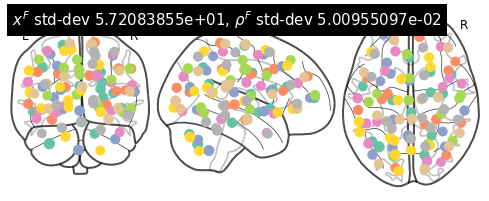

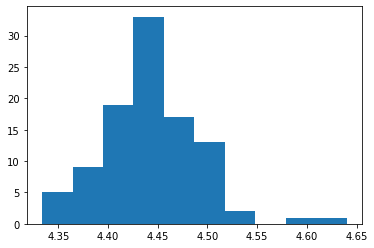

(<nilearn.plotting.displays.OrthoProjector at 0x7fd4aa82adc0>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

432

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Social_a_1.mp4',
 'Spiders_a_3.m4v',
 'Heights_b_3.mov',
 'Social_b_1.mp4',
 'Social_a_3.mp4',
 'Spiders_b_1.m4v',
 'Heights_a_4.mp4',
 'Heights_b_2.m4v',
 'Heights_a_1.mp4',
 'Social_b_3.mp4',
 'Spiders_a_2.mp4',
 'Spiders_a_4.mov',
 'Social_a_4.mp4',
 'Social_b_2.mov',
 'Heights_a_2.m4v',
 'Social_b_4.mov',
 'Heights_b_4.mp4',
 'Heights_a_3.mp4',
 'Social_a_2.m4v',
 'Spiders_b_2.mp4',
 'Heights_b_1.mp4',
 'Spiders_b_4.m4v',
 'Spiders_b_3.mov',
 'Spiders_a_1.m4v']

In [12]:
dtfa.subjects()

[100,
 104,
 105,
 115,
 117,
 123,
 127,
 129,
 130,
 135,
 142,
 147,
 150,
 158,
 159,
 161,
 166,
 169]

In [13]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=1, l_s=1, l_i=1)

10/29/2021 17:34:35 [Epoch 1] (135087ms) ELBO -1.10666312e+11 = log-likelihood -1.10660387e+11 - KL from prior 5.89633597e+06, P weight penalty 8.21279941e+03, S weight penalty 7.19798790e+03, I weight penalty 6.68209566e+03
10/29/2021 17:34:35 Saving checkpoint...
10/29/2021 17:34:53 [Epoch 2] (18163ms) ELBO -1.07480662e+11 = log-likelihood -1.07474956e+11 - KL from prior 5.68277495e+06, P weight penalty 6.57434138e+03, S weight penalty 5.68015316e+03, I weight penalty 6.06622350e+03
10/29/2021 17:35:11 [Epoch 3] (18280ms) ELBO -1.05166339e+11 = log-likelihood -1.05160817e+11 - KL from prior 5.50506369e+06, P weight penalty 5.38793533e+03, S weight penalty 4.80649289e+03, I weight penalty 5.48189429e+03
10/29/2021 17:35:30 [Epoch 4] (18323ms) ELBO -1.03605680e+11 = log-likelihood -1.03600361e+11 - KL from prior 5.31387212e+06, P weight penalty 4.73693134e+03, S weight penalty 4.15249759e+03, I weight penalty 4.84372226e+03
10/29/2021 17:35:48 [Epoch 5] (18304ms) ELBO -1.02560279e+11 =

10/29/2021 17:47:58 [Epoch 45] (18186ms) ELBO -8.33173115e+10 = log-likelihood -8.33152614e+10 - KL from prior 2.04480528e+06, P weight penalty 9.71089036e+02, S weight penalty 9.50319181e+02, I weight penalty 3.48354830e+03
10/29/2021 17:48:16 [Epoch 46] (18219ms) ELBO -8.32161559e+10 = log-likelihood -8.32140876e+10 - KL from prior 2.06286929e+06, P weight penalty 1.03186878e+03, S weight penalty 9.89210889e+02, I weight penalty 3.49999583e+03
10/29/2021 17:48:34 [Epoch 47] (18313ms) ELBO -8.31170408e+10 = log-likelihood -8.31149533e+10 - KL from prior 2.08218752e+06, P weight penalty 1.00832079e+03, S weight penalty 9.74986894e+02, I weight penalty 3.51562563e+03
10/29/2021 17:48:52 [Epoch 48] (18294ms) ELBO -8.30226789e+10 = log-likelihood -8.30205733e+10 - KL from prior 2.10008989e+06, P weight penalty 9.84070168e+02, S weight penalty 9.84072382e+02, I weight penalty 3.52674420e+03
10/29/2021 17:49:11 [Epoch 49] (18448ms) ELBO -8.29278481e+10 = log-likelihood -8.29257265e+10 - KL 

10/29/2021 17:59:17 [Epoch 82] (18464ms) ELBO -8.12457564e+10 = log-likelihood -8.12432283e+10 - KL from prior 2.52252574e+06, P weight penalty 7.09929732e+02, S weight penalty 1.72342371e+03, I weight penalty 3.39461396e+03
10/29/2021 17:59:35 [Epoch 83] (18403ms) ELBO -8.12096620e+10 = log-likelihood -8.12071224e+10 - KL from prior 2.53360928e+06, P weight penalty 7.16490792e+02, S weight penalty 1.75131619e+03, I weight penalty 3.37361727e+03
10/29/2021 17:59:53 [Epoch 84] (18374ms) ELBO -8.11817112e+10 = log-likelihood -8.11791642e+10 - KL from prior 2.54128054e+06, P weight penalty 7.20655800e+02, S weight penalty 1.76573142e+03, I weight penalty 3.35141803e+03
10/29/2021 18:00:12 [Epoch 85] (18441ms) ELBO -8.11451792e+10 = log-likelihood -8.11426229e+10 - KL from prior 2.55038567e+06, P weight penalty 7.58316075e+02, S weight penalty 1.83839093e+03, I weight penalty 3.32793756e+03
10/29/2021 18:00:31 [Epoch 86] (18688ms) ELBO -8.11191108e+10 = log-likelihood -8.11165458e+10 - KL 

10/29/2021 18:10:38 [Epoch 119] (18419ms) ELBO -8.04665368e+10 = log-likelihood -8.04637315e+10 - KL from prior 2.80303365e+06, P weight penalty 6.51775056e+02, S weight penalty 2.56877494e+03, I weight penalty 2.59275064e+03
10/29/2021 18:10:56 [Epoch 120] (18611ms) ELBO -8.04549575e+10 = log-likelihood -8.04521445e+10 - KL from prior 2.81032073e+06, P weight penalty 6.01575564e+02, S weight penalty 2.58990531e+03, I weight penalty 2.58962755e+03
10/29/2021 18:11:15 [Epoch 121] (18422ms) ELBO -8.04358541e+10 = log-likelihood -8.04330349e+10 - KL from prior 2.81651577e+06, P weight penalty 6.45591093e+02, S weight penalty 2.63473345e+03, I weight penalty 2.57719460e+03
10/29/2021 18:11:33 [Epoch 122] (18262ms) ELBO -8.04229799e+10 = log-likelihood -8.04201530e+10 - KL from prior 2.82399449e+06, P weight penalty 6.46369400e+02, S weight penalty 2.61528918e+03, I weight penalty 2.55878428e+03
10/29/2021 18:11:51 [Epoch 123] (18359ms) ELBO -8.04029447e+10 = log-likelihood -8.04001130e+10 

10/29/2021 18:21:57 [Epoch 156] (18244ms) ELBO -8.00718106e+10 = log-likelihood -8.00687957e+10 - KL from prior 3.01155473e+06, P weight penalty 7.44856215e+02, S weight penalty 2.85589133e+03, I weight penalty 2.23241892e+03
10/29/2021 18:22:15 [Epoch 157] (18273ms) ELBO -8.00644029e+10 = log-likelihood -8.00613849e+10 - KL from prior 3.01520334e+06, P weight penalty 7.00849921e+02, S weight penalty 2.80561770e+03, I weight penalty 2.22022818e+03
10/29/2021 18:22:33 [Epoch 158] (18501ms) ELBO -8.00640815e+10 = log-likelihood -8.00610578e+10 - KL from prior 3.02046640e+06, P weight penalty 7.43374739e+02, S weight penalty 2.81933614e+03, I weight penalty 2.21655682e+03
10/29/2021 18:22:52 [Epoch 159] (18541ms) ELBO -8.00547262e+10 = log-likelihood -8.00516971e+10 - KL from prior 3.02590796e+06, P weight penalty 7.44175647e+02, S weight penalty 2.81230683e+03, I weight penalty 2.20732248e+03
10/29/2021 18:23:10 [Epoch 160] (18280ms) ELBO -8.00529282e+10 = log-likelihood -8.00498952e+10 

10/29/2021 18:33:18 [Epoch 193] (18211ms) ELBO -7.98169278e+10 = log-likelihood -7.98137495e+10 - KL from prior 3.17470601e+06, P weight penalty 1.03452555e+03, S weight penalty 2.84570409e+03, I weight penalty 2.04454033e+03
10/29/2021 18:33:36 [Epoch 194] (18156ms) ELBO -7.98053136e+10 = log-likelihood -7.98021304e+10 - KL from prior 3.17990434e+06, P weight penalty 1.06248996e+03, S weight penalty 2.84242871e+03, I weight penalty 2.04206116e+03
10/29/2021 18:33:54 [Epoch 195] (18127ms) ELBO -7.98010665e+10 = log-likelihood -7.97978794e+10 - KL from prior 3.18379576e+06, P weight penalty 1.05553290e+03, S weight penalty 2.81265839e+03, I weight penalty 2.03121204e+03
10/29/2021 18:34:12 [Epoch 196] (18178ms) ELBO -7.97962717e+10 = log-likelihood -7.97930809e+10 - KL from prior 3.18734560e+06, P weight penalty 1.07083036e+03, S weight penalty 2.84723388e+03, I weight penalty 2.03136159e+03
10/29/2021 18:34:31 [Epoch 197] (18655ms) ELBO -7.97946748e+10 = log-likelihood -7.97914806e+10 

10/29/2021 18:44:37 [Epoch 230] (18487ms) ELBO -7.96633209e+10 = log-likelihood -7.96600041e+10 - KL from prior 3.31343542e+06, P weight penalty 1.37795824e+03, S weight penalty 2.84761443e+03, I weight penalty 1.89989328e+03
10/29/2021 18:44:56 [Epoch 231] (18170ms) ELBO -7.96563047e+10 = log-likelihood -7.96529851e+10 - KL from prior 3.31611127e+06, P weight penalty 1.40760270e+03, S weight penalty 2.81612229e+03, I weight penalty 1.89493753e+03
10/29/2021 18:45:14 [Epoch 232] (18380ms) ELBO -7.96548227e+10 = log-likelihood -7.96514987e+10 - KL from prior 3.32022609e+06, P weight penalty 1.38479221e+03, S weight penalty 2.86530050e+03, I weight penalty 1.89087978e+03
10/29/2021 18:45:32 [Epoch 233] (18124ms) ELBO -7.96545743e+10 = log-likelihood -7.96512483e+10 - KL from prior 3.32230894e+06, P weight penalty 1.45433759e+03, S weight penalty 2.83968628e+03, I weight penalty 1.88972515e+03
10/29/2021 18:45:50 [Epoch 234] (18104ms) ELBO -7.96466561e+10 = log-likelihood -7.96433236e+10 

10/29/2021 18:55:59 [Epoch 267] (18320ms) ELBO -7.95324309e+10 = log-likelihood -7.95289961e+10 - KL from prior 3.43086147e+06, P weight penalty 1.67770871e+03, S weight penalty 2.79239591e+03, I weight penalty 1.83428637e+03
10/29/2021 18:56:17 [Epoch 268] (18218ms) ELBO -7.95304888e+10 = log-likelihood -7.95270507e+10 - KL from prior 3.43415171e+06, P weight penalty 1.64947926e+03, S weight penalty 2.86438111e+03, I weight penalty 1.83583851e+03
10/29/2021 18:56:35 [Epoch 269] (18147ms) ELBO -7.95265438e+10 = log-likelihood -7.95231013e+10 - KL from prior 3.43858902e+06, P weight penalty 1.73662729e+03, S weight penalty 2.80384186e+03, I weight penalty 1.83623522e+03
10/29/2021 18:56:53 [Epoch 270] (18246ms) ELBO -7.95259196e+10 = log-likelihood -7.95224755e+10 - KL from prior 3.44021888e+06, P weight penalty 1.68294097e+03, S weight penalty 2.80332374e+03, I weight penalty 1.83228691e+03
10/29/2021 18:57:12 [Epoch 271] (18239ms) ELBO -7.95261066e+10 = log-likelihood -7.95226620e+10 

10/29/2021 19:07:19 [Epoch 304] (18232ms) ELBO -7.94429762e+10 = log-likelihood -7.94394403e+10 - KL from prior 3.53232352e+06, P weight penalty 1.85715680e+03, S weight penalty 2.81362460e+03, I weight penalty 1.83626991e+03
10/29/2021 19:07:37 [Epoch 305] (18227ms) ELBO -7.94462695e+10 = log-likelihood -7.94427309e+10 - KL from prior 3.53446388e+06, P weight penalty 1.89015077e+03, S weight penalty 2.79417734e+03, I weight penalty 1.83777485e+03
10/29/2021 19:07:56 [Epoch 306] (18357ms) ELBO -7.94584119e+10 = log-likelihood -7.94548717e+10 - KL from prior 3.53641950e+06, P weight penalty 1.88602211e+03, S weight penalty 2.73159907e+03, I weight penalty 1.83973133e+03
10/29/2021 19:08:14 [Epoch 307] (18091ms) ELBO -7.94580393e+10 = log-likelihood -7.94544958e+10 - KL from prior 3.53995671e+06, P weight penalty 1.91688235e+03, S weight penalty 2.79794328e+03, I weight penalty 1.84705256e+03
10/29/2021 19:08:32 [Epoch 308] (18308ms) ELBO -7.94596070e+10 = log-likelihood -7.94560618e+10 

10/29/2021 19:18:39 [Epoch 341] (18192ms) ELBO -7.93543484e+10 = log-likelihood -7.93507225e+10 - KL from prior 3.62169460e+06, P weight penalty 1.94993302e+03, S weight penalty 2.73207304e+03, I weight penalty 1.87404803e+03
10/29/2021 19:18:58 [Epoch 342] (18224ms) ELBO -7.93570975e+10 = log-likelihood -7.93534700e+10 - KL from prior 3.62352123e+06, P weight penalty 1.98574797e+03, S weight penalty 2.76724286e+03, I weight penalty 1.87956472e+03
10/29/2021 19:19:16 [Epoch 343] (18251ms) ELBO -7.93548419e+10 = log-likelihood -7.93512128e+10 - KL from prior 3.62514294e+06, P weight penalty 1.99449863e+03, S weight penalty 2.71894629e+03, I weight penalty 1.88092530e+03
10/29/2021 19:19:34 [Epoch 344] (18233ms) ELBO -7.93593886e+10 = log-likelihood -7.93557568e+10 - KL from prior 3.62842981e+06, P weight penalty 1.92236238e+03, S weight penalty 2.75599987e+03, I weight penalty 1.86991321e+03
10/29/2021 19:19:52 [Epoch 345] (18229ms) ELBO -7.93572514e+10 = log-likelihood -7.93536187e+10 

10/29/2021 19:30:00 [Epoch 378] (18156ms) ELBO -7.93185966e+10 = log-likelihood -7.93148935e+10 - KL from prior 3.69900173e+06, P weight penalty 1.96564484e+03, S weight penalty 2.75723183e+03, I weight penalty 1.87524553e+03
10/29/2021 19:30:19 [Epoch 379] (18404ms) ELBO -7.93177524e+10 = log-likelihood -7.93140474e+10 - KL from prior 3.70105446e+06, P weight penalty 2.04410768e+03, S weight penalty 2.73533126e+03, I weight penalty 1.88619970e+03
10/29/2021 19:30:37 [Epoch 380] (18263ms) ELBO -7.93146342e+10 = log-likelihood -7.93109264e+10 - KL from prior 3.70354577e+06, P weight penalty 2.03685466e+03, S weight penalty 2.74542640e+03, I weight penalty 1.88185455e+03
10/29/2021 19:30:55 [Epoch 381] (18495ms) ELBO -7.93123418e+10 = log-likelihood -7.93086345e+10 - KL from prior 3.70347890e+06, P weight penalty 1.98852519e+03, S weight penalty 2.70429698e+03, I weight penalty 1.87007704e+03
10/29/2021 19:31:14 [Epoch 382] (18259ms) ELBO -7.93060635e+10 = log-likelihood -7.93023521e+10 

10/29/2021 19:41:21 [Epoch 415] (18498ms) ELBO -7.92380259e+10 = log-likelihood -7.92342541e+10 - KL from prior 3.76783931e+06, P weight penalty 2.05484383e+03, S weight penalty 2.72992520e+03, I weight penalty 1.86851216e+03
10/29/2021 19:41:39 [Epoch 416] (18155ms) ELBO -7.92431557e+10 = log-likelihood -7.92393825e+10 - KL from prior 3.76967831e+06, P weight penalty 2.04418100e+03, S weight penalty 2.76500712e+03, I weight penalty 1.86584177e+03
10/29/2021 19:41:57 [Epoch 417] (18118ms) ELBO -7.92381404e+10 = log-likelihood -7.92343647e+10 - KL from prior 3.77144135e+06, P weight penalty 2.06294387e+03, S weight penalty 2.75339363e+03, I weight penalty 1.86265396e+03
10/29/2021 19:42:15 [Epoch 418] (18175ms) ELBO -7.92391352e+10 = log-likelihood -7.92353602e+10 - KL from prior 3.77108581e+06, P weight penalty 2.01898603e+03, S weight penalty 2.72719421e+03, I weight penalty 1.86228239e+03
10/29/2021 19:42:34 [Epoch 419] (18310ms) ELBO -7.92318520e+10 = log-likelihood -7.92280739e+10 

10/29/2021 19:52:43 [Epoch 452] (18872ms) ELBO -7.92108558e+10 = log-likelihood -7.92070216e+10 - KL from prior 3.82975823e+06, P weight penalty 2.10605563e+03, S weight penalty 2.77059105e+03, I weight penalty 1.87160963e+03
10/29/2021 19:53:02 [Epoch 453] (18664ms) ELBO -7.92067195e+10 = log-likelihood -7.92028844e+10 - KL from prior 3.83117030e+06, P weight penalty 2.08102783e+03, S weight penalty 2.72603292e+03, I weight penalty 1.86500156e+03
10/29/2021 19:53:21 [Epoch 454] (18600ms) ELBO -7.92001127e+10 = log-likelihood -7.91962748e+10 - KL from prior 3.83374839e+06, P weight penalty 2.06460809e+03, S weight penalty 2.73834605e+03, I weight penalty 1.86124965e+03
10/29/2021 19:53:39 [Epoch 455] (18627ms) ELBO -7.91935503e+10 = log-likelihood -7.91897107e+10 - KL from prior 3.83530048e+06, P weight penalty 2.11080821e+03, S weight penalty 2.69902145e+03, I weight penalty 1.87578994e+03
10/29/2021 19:53:57 [Epoch 456] (18116ms) ELBO -7.91901181e+10 = log-likelihood -7.91862769e+10 

10/29/2021 20:04:07 [Epoch 489] (18378ms) ELBO -7.91793213e+10 = log-likelihood -7.91754323e+10 - KL from prior 3.88477450e+06, P weight penalty 2.11016474e+03, S weight penalty 2.77306297e+03, I weight penalty 1.88369501e+03
10/29/2021 20:04:25 [Epoch 490] (18395ms) ELBO -7.91657544e+10 = log-likelihood -7.91618606e+10 - KL from prior 3.88962431e+06, P weight penalty 2.09006938e+03, S weight penalty 2.75903486e+03, I weight penalty 1.88260050e+03
10/29/2021 20:04:44 [Epoch 491] (18290ms) ELBO -7.91726172e+10 = log-likelihood -7.91687250e+10 - KL from prior 3.88757064e+06, P weight penalty 2.11238774e+03, S weight penalty 2.71266661e+03, I weight penalty 1.89176971e+03
10/29/2021 20:05:02 [Epoch 492] (18413ms) ELBO -7.91583274e+10 = log-likelihood -7.91544308e+10 - KL from prior 3.89233235e+06, P weight penalty 2.08431871e+03, S weight penalty 2.71289440e+03, I weight penalty 1.88696044e+03
10/29/2021 20:05:20 [Epoch 493] (18157ms) ELBO -7.91694283e+10 = log-likelihood -7.91655331e+10 

10/29/2021 20:15:29 [Epoch 526] (18204ms) ELBO -7.91526570e+10 = log-likelihood -7.91487130e+10 - KL from prior 3.93912871e+06, P weight penalty 2.15385243e+03, S weight penalty 2.73181289e+03, I weight penalty 1.91391174e+03
10/29/2021 20:15:47 [Epoch 527] (18231ms) ELBO -7.91477195e+10 = log-likelihood -7.91437771e+10 - KL from prior 3.93818809e+06, P weight penalty 2.12262111e+03, S weight penalty 2.71283978e+03, I weight penalty 1.91050277e+03
10/29/2021 20:16:06 [Epoch 528] (18623ms) ELBO -7.91345058e+10 = log-likelihood -7.91305610e+10 - KL from prior 3.94043283e+06, P weight penalty 2.11411382e+03, S weight penalty 2.73988841e+03, I weight penalty 1.91263504e+03
10/29/2021 20:16:25 [Epoch 529] (18608ms) ELBO -7.91336228e+10 = log-likelihood -7.91296780e+10 - KL from prior 3.94025896e+06, P weight penalty 2.14906489e+03, S weight penalty 2.74120636e+03, I weight penalty 1.91255313e+03
10/29/2021 20:16:43 [Epoch 530] (18414ms) ELBO -7.91267656e+10 = log-likelihood -7.91228178e+10 

10/29/2021 20:26:49 [Epoch 563] (18449ms) ELBO -7.91260280e+10 = log-likelihood -7.91220378e+10 - KL from prior 3.98577338e+06, P weight penalty 2.14926113e+03, S weight penalty 2.71548143e+03, I weight penalty 1.90763927e+03
10/29/2021 20:27:08 [Epoch 564] (18363ms) ELBO -7.91191135e+10 = log-likelihood -7.91151218e+10 - KL from prior 3.98719169e+06, P weight penalty 2.16517479e+03, S weight penalty 2.73074454e+03, I weight penalty 1.91231901e+03
10/29/2021 20:27:26 [Epoch 565] (18253ms) ELBO -7.91244406e+10 = log-likelihood -7.91204500e+10 - KL from prior 3.98599789e+06, P weight penalty 2.16370409e+03, S weight penalty 2.72161198e+03, I weight penalty 1.91247053e+03
10/29/2021 20:27:45 [Epoch 566] (18843ms) ELBO -7.91133249e+10 = log-likelihood -7.91093301e+10 - KL from prior 3.99008234e+06, P weight penalty 2.15223308e+03, S weight penalty 2.76861205e+03, I weight penalty 1.91071714e+03
10/29/2021 20:28:03 [Epoch 567] (18243ms) ELBO -7.91171869e+10 = log-likelihood -7.91131925e+10 

10/29/2021 20:38:08 [Epoch 600] (18094ms) ELBO -7.90938725e+10 = log-likelihood -7.90898378e+10 - KL from prior 4.03020504e+06, P weight penalty 2.14218638e+03, S weight penalty 2.70502894e+03, I weight penalty 1.90560938e+03
10/29/2021 20:38:26 [Epoch 601] (18210ms) ELBO -7.90998676e+10 = log-likelihood -7.90958324e+10 - KL from prior 4.03087455e+06, P weight penalty 2.13223653e+03, S weight penalty 2.71854552e+03, I weight penalty 1.90394334e+03
10/29/2021 20:38:26 Saving checkpoint...
10/29/2021 20:38:45 [Epoch 602] (18553ms) ELBO -7.91079982e+10 = log-likelihood -7.91039610e+10 - KL from prior 4.03258875e+06, P weight penalty 2.14490753e+03, S weight penalty 2.72312890e+03, I weight penalty 1.90346018e+03
10/29/2021 20:39:03 [Epoch 603] (18386ms) ELBO -7.91115072e+10 = log-likelihood -7.91074703e+10 - KL from prior 4.03265381e+06, P weight penalty 2.14081819e+03, S weight penalty 2.72109221e+03, I weight penalty 1.90116217e+03
10/29/2021 20:39:22 [Epoch 604] (18303ms) ELBO -7.91167

10/29/2021 20:49:30 [Epoch 637] (18171ms) ELBO -7.90638088e+10 = log-likelihood -7.90597334e+10 - KL from prior 4.07097115e+06, P weight penalty 2.17123667e+03, S weight penalty 2.70768109e+03, I weight penalty 1.89838793e+03
10/29/2021 20:49:48 [Epoch 638] (18188ms) ELBO -7.90624145e+10 = log-likelihood -7.90583383e+10 - KL from prior 4.07215288e+06, P weight penalty 2.15153318e+03, S weight penalty 2.69348585e+03, I weight penalty 1.89798613e+03
10/29/2021 20:50:06 [Epoch 639] (18254ms) ELBO -7.90680838e+10 = log-likelihood -7.90640066e+10 - KL from prior 4.07292247e+06, P weight penalty 2.12648339e+03, S weight penalty 2.73341242e+03, I weight penalty 1.89052515e+03
10/29/2021 20:50:25 [Epoch 640] (18670ms) ELBO -7.90648667e+10 = log-likelihood -7.90607881e+10 - KL from prior 4.07423199e+06, P weight penalty 2.16380108e+03, S weight penalty 2.67775612e+03, I weight penalty 1.90282592e+03
10/29/2021 20:50:43 [Epoch 641] (18330ms) ELBO -7.90661498e+10 = log-likelihood -7.90620699e+10 

10/29/2021 21:00:53 [Epoch 674] (18879ms) ELBO -7.90666470e+10 = log-likelihood -7.90625321e+10 - KL from prior 4.11074407e+06, P weight penalty 2.14131150e+03, S weight penalty 2.66479908e+03, I weight penalty 1.92530262e+03
10/29/2021 21:01:11 [Epoch 675] (18322ms) ELBO -7.90664930e+10 = log-likelihood -7.90623785e+10 - KL from prior 4.11065246e+06, P weight penalty 2.15019185e+03, S weight penalty 2.67334572e+03, I weight penalty 1.91763111e+03
10/29/2021 21:01:30 [Epoch 676] (18363ms) ELBO -7.90559173e+10 = log-likelihood -7.90518000e+10 - KL from prior 4.11249390e+06, P weight penalty 2.14474960e+03, S weight penalty 2.71015411e+03, I weight penalty 1.92624632e+03
10/29/2021 21:01:49 [Epoch 677] (18719ms) ELBO -7.90542199e+10 = log-likelihood -7.90501012e+10 - KL from prior 4.11428048e+06, P weight penalty 2.13714033e+03, S weight penalty 2.72091422e+03, I weight penalty 1.91711523e+03
10/29/2021 21:02:07 [Epoch 678] (18409ms) ELBO -7.90399218e+10 = log-likelihood -7.90358038e+10 

10/29/2021 21:12:16 [Epoch 711] (18273ms) ELBO -7.90530776e+10 = log-likelihood -7.90489277e+10 - KL from prior 4.14581160e+06, P weight penalty 2.12420518e+03, S weight penalty 2.70702791e+03, I weight penalty 1.96543997e+03
10/29/2021 21:12:34 [Epoch 712] (18195ms) ELBO -7.90524241e+10 = log-likelihood -7.90482734e+10 - KL from prior 4.14644428e+06, P weight penalty 2.12747317e+03, S weight penalty 2.70920021e+03, I weight penalty 1.96563077e+03
10/29/2021 21:12:52 [Epoch 713] (18253ms) ELBO -7.90502280e+10 = log-likelihood -7.90460760e+10 - KL from prior 4.14759624e+06, P weight penalty 2.14081181e+03, S weight penalty 2.71494634e+03, I weight penalty 1.97274731e+03
10/29/2021 21:13:10 [Epoch 714] (18138ms) ELBO -7.90463078e+10 = log-likelihood -7.90421539e+10 - KL from prior 4.14981903e+06, P weight penalty 2.10709109e+03, S weight penalty 2.74087071e+03, I weight penalty 1.95596452e+03
10/29/2021 21:13:28 [Epoch 715] (18163ms) ELBO -7.90412590e+10 = log-likelihood -7.90371049e+10 

10/29/2021 21:23:33 [Epoch 748] (18473ms) ELBO -7.90248266e+10 = log-likelihood -7.90206438e+10 - KL from prior 4.17865849e+06, P weight penalty 2.07923448e+03, S weight penalty 2.70364795e+03, I weight penalty 2.00343593e+03
10/29/2021 21:23:52 [Epoch 749] (18588ms) ELBO -7.90323665e+10 = log-likelihood -7.90281826e+10 - KL from prior 4.18001479e+06, P weight penalty 2.04754513e+03, S weight penalty 2.69168823e+03, I weight penalty 1.99841897e+03
10/29/2021 21:24:10 [Epoch 750] (18104ms) ELBO -7.90287927e+10 = log-likelihood -7.90246074e+10 - KL from prior 4.18138099e+06, P weight penalty 2.10151548e+03, S weight penalty 2.68971757e+03, I weight penalty 2.01289311e+03
10/29/2021 21:24:28 [Epoch 751] (18191ms) ELBO -7.90288871e+10 = log-likelihood -7.90247026e+10 - KL from prior 4.18039492e+06, P weight penalty 2.05464902e+03, S weight penalty 2.68490612e+03, I weight penalty 2.00414467e+03
10/29/2021 21:24:47 [Epoch 752] (18637ms) ELBO -7.90204510e+10 = log-likelihood -7.90162644e+10 

10/29/2021 21:34:53 [Epoch 785] (18244ms) ELBO -7.90116178e+10 = log-likelihood -7.90074027e+10 - KL from prior 4.21083868e+06, P weight penalty 1.99999392e+03, S weight penalty 2.68000861e+03, I weight penalty 2.06183329e+03
10/29/2021 21:35:11 [Epoch 786] (18110ms) ELBO -7.90007914e+10 = log-likelihood -7.89965740e+10 - KL from prior 4.21274077e+06, P weight penalty 2.04372808e+03, S weight penalty 2.72834439e+03, I weight penalty 2.06794727e+03
10/29/2021 21:35:29 [Epoch 787] (18606ms) ELBO -7.90028643e+10 = log-likelihood -7.89986480e+10 - KL from prior 4.21174902e+06, P weight penalty 1.99454522e+03, S weight penalty 2.69572184e+03, I weight penalty 2.04648236e+03
10/29/2021 21:35:48 [Epoch 788] (18537ms) ELBO -7.89929145e+10 = log-likelihood -7.89886973e+10 - KL from prior 4.21270261e+06, P weight penalty 2.05044954e+03, S weight penalty 2.70115292e+03, I weight penalty 2.08208742e+03
10/29/2021 21:36:06 [Epoch 789] (18458ms) ELBO -7.89946323e+10 = log-likelihood -7.89904145e+10 

10/29/2021 21:46:13 [Epoch 822] (18601ms) ELBO -7.89878421e+10 = log-likelihood -7.89835966e+10 - KL from prior 4.24140701e+06, P weight penalty 1.96504949e+03, S weight penalty 2.66852597e+03, I weight penalty 2.13458982e+03
10/29/2021 21:46:31 [Epoch 823] (18779ms) ELBO -7.89814809e+10 = log-likelihood -7.89772337e+10 - KL from prior 4.24228612e+06, P weight penalty 1.97765459e+03, S weight penalty 2.68089504e+03, I weight penalty 2.15132884e+03
10/29/2021 21:46:50 [Epoch 824] (18788ms) ELBO -7.89856368e+10 = log-likelihood -7.89813888e+10 - KL from prior 4.24306353e+06, P weight penalty 1.96339151e+03, S weight penalty 2.68477595e+03, I weight penalty 2.13565263e+03
10/29/2021 21:47:09 [Epoch 825] (18676ms) ELBO -7.89805373e+10 = log-likelihood -7.89762905e+10 - KL from prior 4.24259756e+06, P weight penalty 2.01414810e+03, S weight penalty 2.69198506e+03, I weight penalty 2.16558094e+03
10/29/2021 21:47:27 [Epoch 826] (18608ms) ELBO -7.89850032e+10 = log-likelihood -7.89807543e+10 

10/29/2021 21:57:34 [Epoch 859] (18441ms) ELBO -7.89683311e+10 = log-likelihood -7.89640560e+10 - KL from prior 4.27054028e+06, P weight penalty 1.92490888e+03, S weight penalty 2.64513839e+03, I weight penalty 2.23886711e+03
10/29/2021 21:57:52 [Epoch 860] (18286ms) ELBO -7.89718425e+10 = log-likelihood -7.89675686e+10 - KL from prior 4.26928546e+06, P weight penalty 1.90747994e+03, S weight penalty 2.72109371e+03, I weight penalty 2.24755297e+03
10/29/2021 21:58:11 [Epoch 861] (18840ms) ELBO -7.89783321e+10 = log-likelihood -7.89740549e+10 - KL from prior 4.27245462e+06, P weight penalty 1.94096282e+03, S weight penalty 2.69318166e+03, I weight penalty 2.25048580e+03
10/29/2021 21:58:29 [Epoch 862] (18422ms) ELBO -7.89798772e+10 = log-likelihood -7.89756009e+10 - KL from prior 4.27158875e+06, P weight penalty 1.91275675e+03, S weight penalty 2.69140575e+03, I weight penalty 2.24968176e+03
10/29/2021 21:58:48 [Epoch 863] (18297ms) ELBO -7.89853085e+10 = log-likelihood -7.89810291e+10 

10/29/2021 22:08:56 [Epoch 896] (18264ms) ELBO -7.89629738e+10 = log-likelihood -7.89586725e+10 - KL from prior 4.29652487e+06, P weight penalty 1.87092052e+03, S weight penalty 2.67163874e+03, I weight penalty 2.34267147e+03
10/29/2021 22:09:15 [Epoch 897] (18772ms) ELBO -7.89501391e+10 = log-likelihood -7.89458339e+10 - KL from prior 4.30032204e+06, P weight penalty 1.82377311e+03, S weight penalty 2.66834785e+03, I weight penalty 2.30874084e+03
10/29/2021 22:09:33 [Epoch 898] (18253ms) ELBO -7.89548768e+10 = log-likelihood -7.89505730e+10 - KL from prior 4.29921975e+06, P weight penalty 1.85534008e+03, S weight penalty 2.67364834e+03, I weight penalty 2.33124132e+03
10/29/2021 22:09:52 [Epoch 899] (18610ms) ELBO -7.89491591e+10 = log-likelihood -7.89448552e+10 - KL from prior 4.29932405e+06, P weight penalty 1.85194850e+03, S weight penalty 2.66623554e+03, I weight penalty 2.33476640e+03
10/29/2021 22:10:10 [Epoch 900] (18271ms) ELBO -7.89533075e+10 = log-likelihood -7.89490015e+10 

10/29/2021 22:20:15 [Epoch 933] (18393ms) ELBO -7.89462220e+10 = log-likelihood -7.89418936e+10 - KL from prior 4.32374690e+06, P weight penalty 1.77237824e+03, S weight penalty 2.63930740e+03, I weight penalty 2.38768542e+03
10/29/2021 22:20:34 [Epoch 934] (18418ms) ELBO -7.89473849e+10 = log-likelihood -7.89430542e+10 - KL from prior 4.32563514e+06, P weight penalty 1.84327148e+03, S weight penalty 2.67074957e+03, I weight penalty 2.43164027e+03
10/29/2021 22:20:52 [Epoch 935] (18274ms) ELBO -7.89431508e+10 = log-likelihood -7.89388210e+10 - KL from prior 4.32491479e+06, P weight penalty 1.80386033e+03, S weight penalty 2.62772390e+03, I weight penalty 2.42331607e+03
10/29/2021 22:21:10 [Epoch 936] (18198ms) ELBO -7.89462910e+10 = log-likelihood -7.89419586e+10 - KL from prior 4.32765408e+06, P weight penalty 1.81338665e+03, S weight penalty 2.63233381e+03, I weight penalty 2.41526749e+03
10/29/2021 22:21:29 [Epoch 937] (18448ms) ELBO -7.89410711e+10 = log-likelihood -7.89367395e+10 

10/29/2021 22:31:35 [Epoch 970] (18180ms) ELBO -7.89424551e+10 = log-likelihood -7.89380999e+10 - KL from prior 4.34970598e+06, P weight penalty 1.78074060e+03, S weight penalty 2.68723974e+03, I weight penalty 2.49095485e+03
10/29/2021 22:31:54 [Epoch 971] (18420ms) ELBO -7.89334172e+10 = log-likelihood -7.89290606e+10 - KL from prior 4.35151371e+06, P weight penalty 1.75777965e+03, S weight penalty 2.61517792e+03, I weight penalty 2.48061238e+03
10/29/2021 22:32:12 [Epoch 972] (18426ms) ELBO -7.89300488e+10 = log-likelihood -7.89256916e+10 - KL from prior 4.35207520e+06, P weight penalty 1.80020015e+03, S weight penalty 2.65476316e+03, I weight penalty 2.51303216e+03
10/29/2021 22:32:30 [Epoch 973] (18256ms) ELBO -7.89252569e+10 = log-likelihood -7.89208991e+10 - KL from prior 4.35241077e+06, P weight penalty 1.72282579e+03, S weight penalty 2.66868521e+03, I weight penalty 2.46898250e+03
10/29/2021 22:32:49 [Epoch 974] (18325ms) ELBO -7.89261602e+10 = log-likelihood -7.89218014e+10 

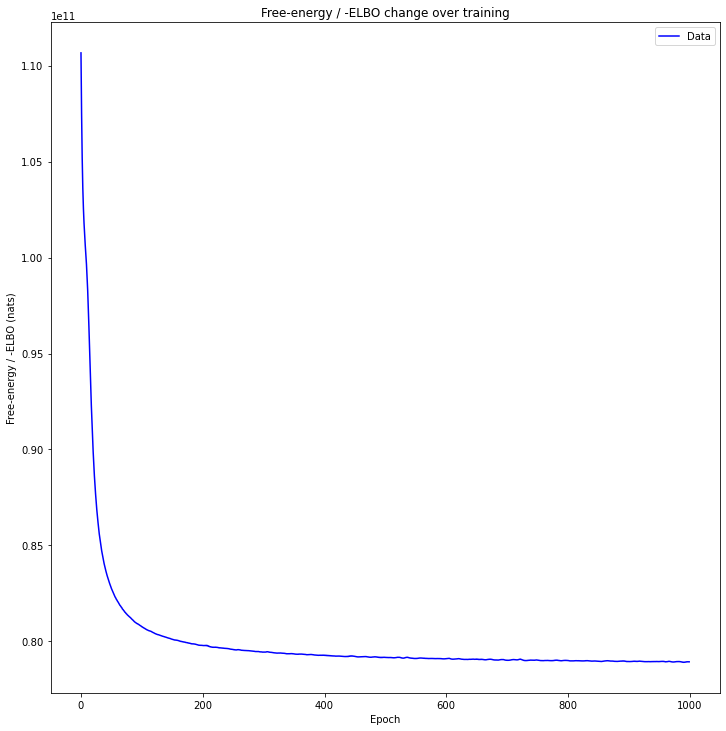

In [14]:
utils.plot_losses(losses)

In [15]:
len(dtfa.subjects())

18

In [16]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_degeneracy_new_batching/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


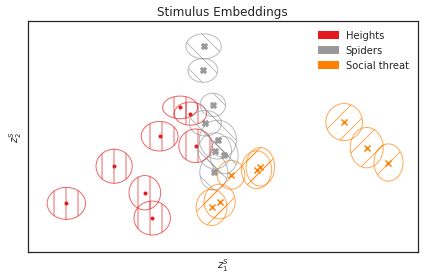

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [18]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_degeneracy_new_batching/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


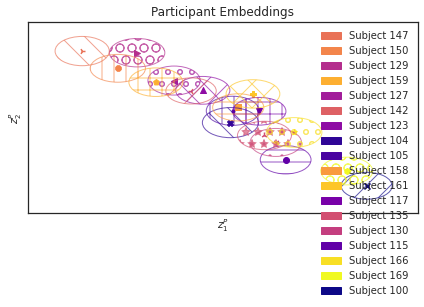

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

/home/zulqarnain/Code/ntfa_degeneracy_new_batching/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


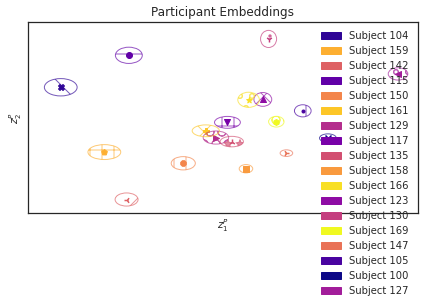

In [27]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [20]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/29/2021 22:40:48 Plotting factors for Participant 100, run 1


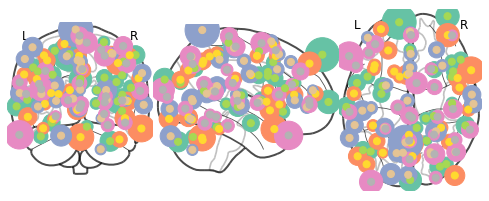

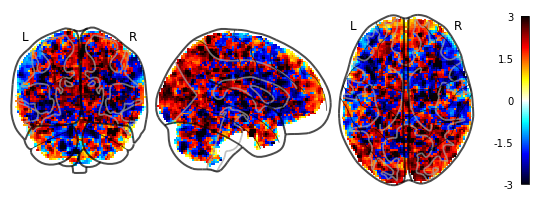

10/29/2021 22:40:56 Reconstruction Error (Frobenius Norm): 4.80066528e+02 out of 4.16033997e+02


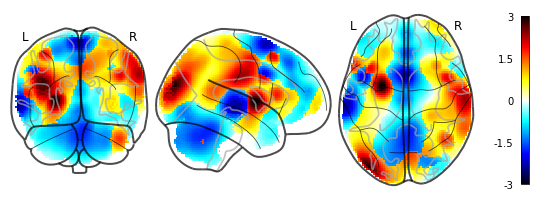

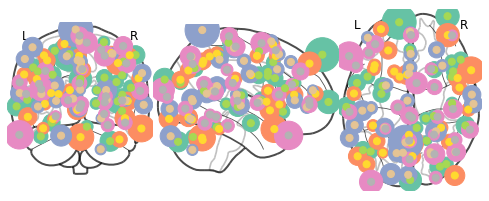

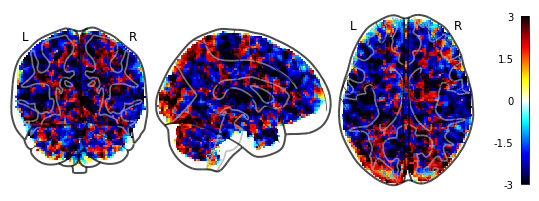

10/29/2021 22:41:07 Reconstruction Error (Frobenius Norm): 5.01606750e+02 out of 4.71019623e+02


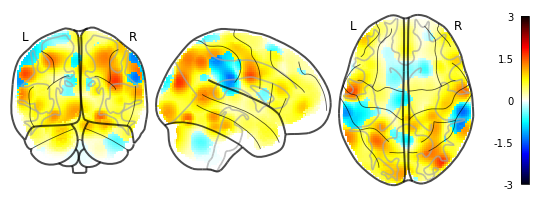

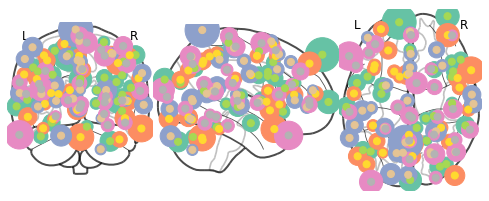

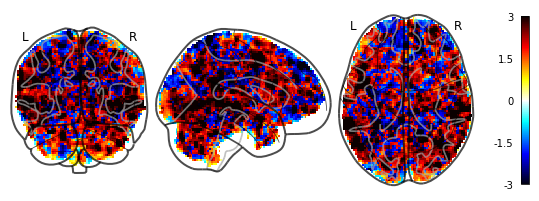

10/29/2021 22:41:19 Reconstruction Error (Frobenius Norm): 5.34591492e+02 out of 4.57979218e+02


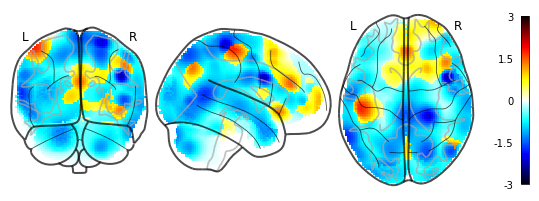

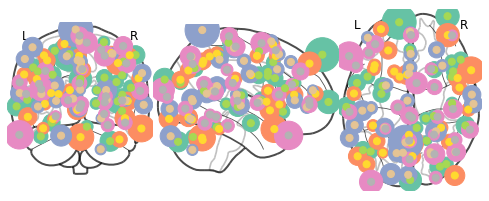

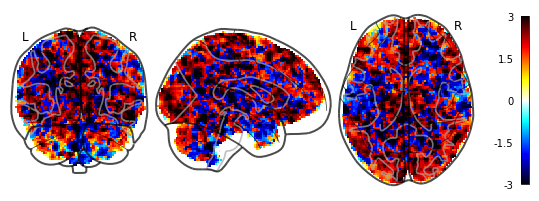

10/29/2021 22:41:32 Reconstruction Error (Frobenius Norm): 4.66390015e+02 out of 4.39315796e+02


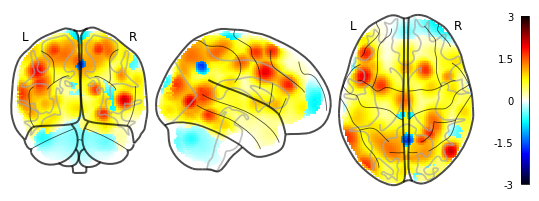

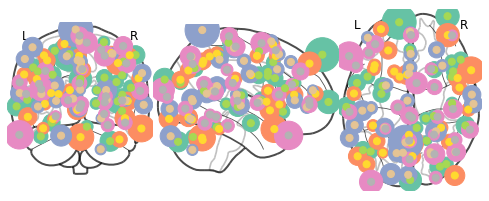

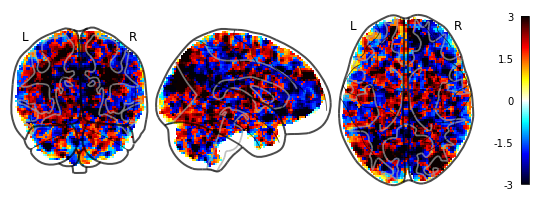

10/29/2021 22:41:45 Reconstruction Error (Frobenius Norm): 4.50217468e+02 out of 4.42231964e+02


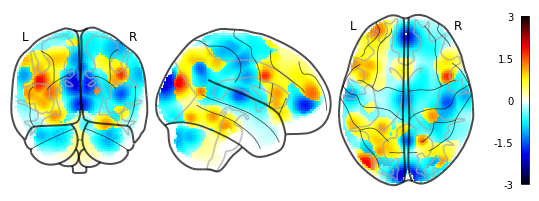

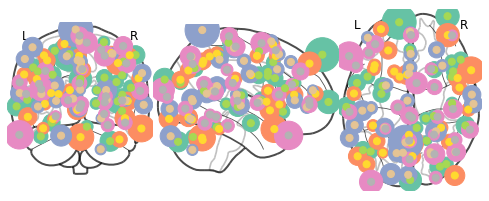

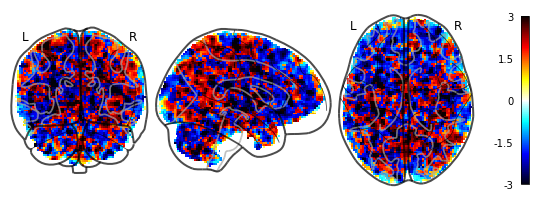

10/29/2021 22:41:58 Reconstruction Error (Frobenius Norm): 4.14705475e+02 out of 4.17745667e+02


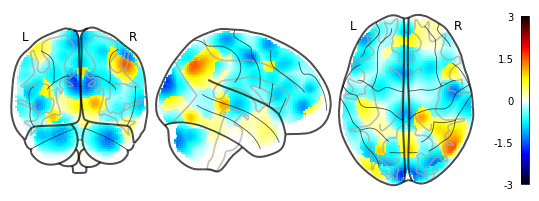

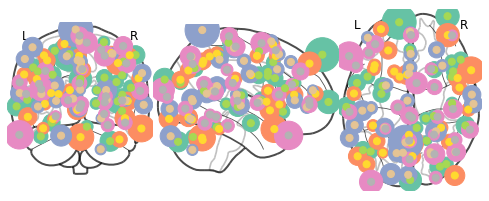

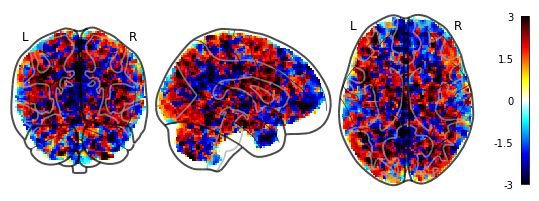

10/29/2021 22:42:13 Reconstruction Error (Frobenius Norm): 4.30607178e+02 out of 4.16963470e+02


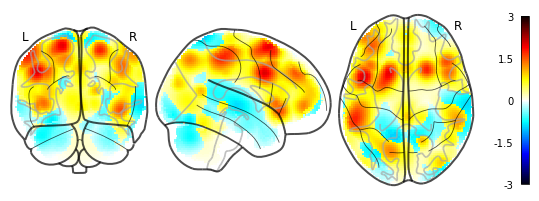

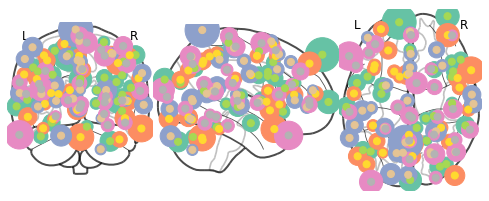

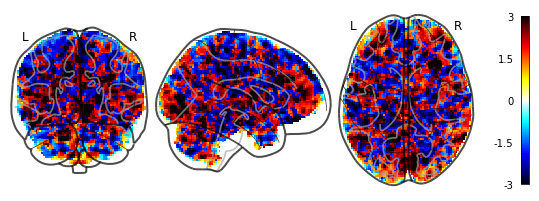

10/29/2021 22:42:28 Reconstruction Error (Frobenius Norm): 4.67759247e+02 out of 4.28262360e+02


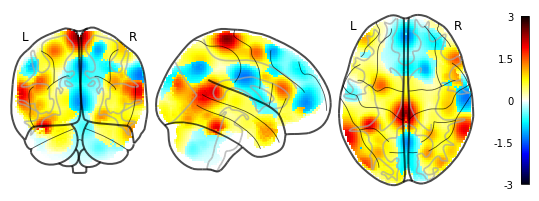

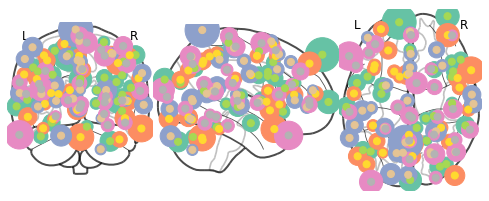

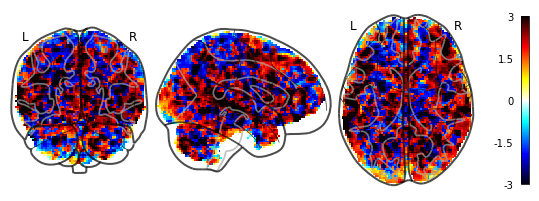

10/29/2021 22:42:44 Reconstruction Error (Frobenius Norm): 4.72728027e+02 out of 4.38168549e+02


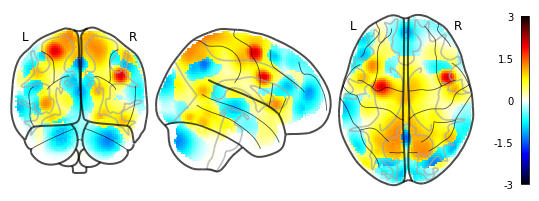

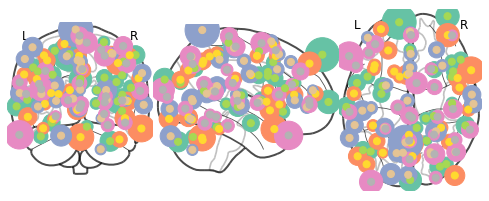

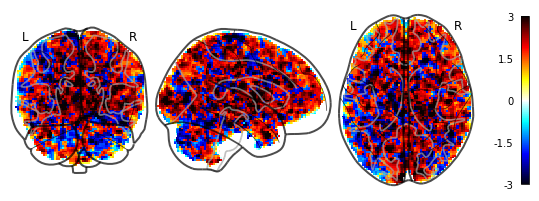

10/29/2021 22:43:01 Reconstruction Error (Frobenius Norm): 4.34889130e+02 out of 4.21970734e+02


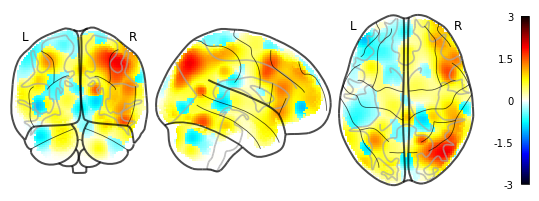

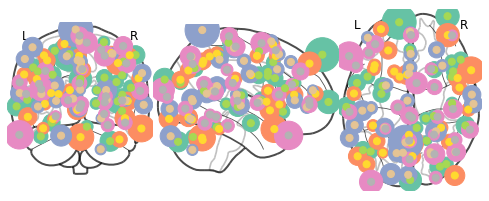

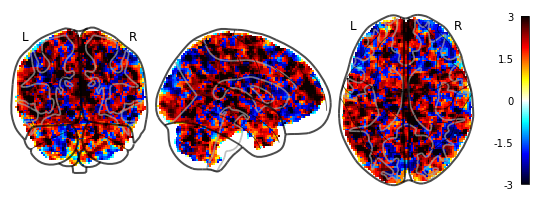

10/29/2021 22:43:20 Reconstruction Error (Frobenius Norm): 4.79227264e+02 out of 4.45066833e+02


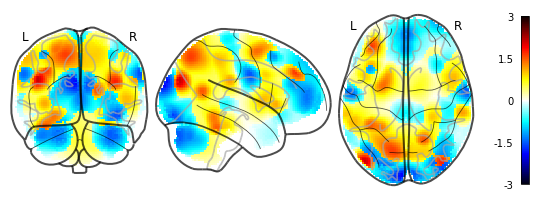

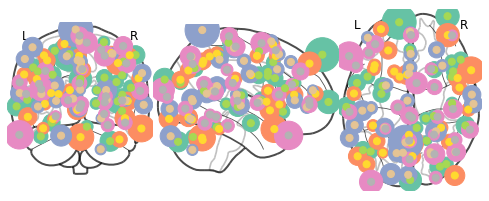

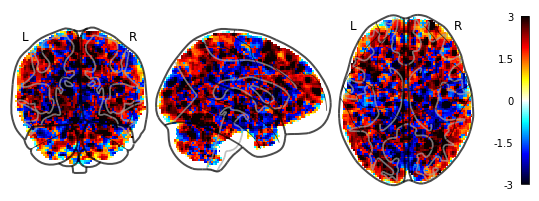

10/29/2021 22:43:38 Reconstruction Error (Frobenius Norm): 4.88422913e+02 out of 4.44022888e+02


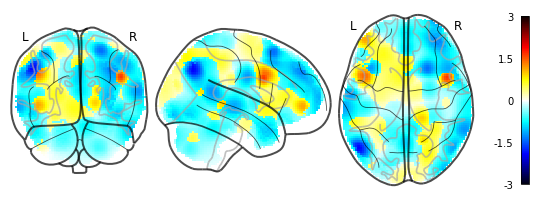

In [21]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

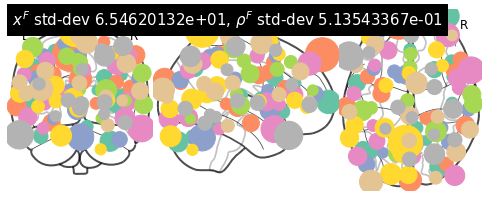

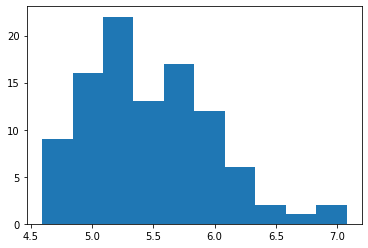

(<nilearn.plotting.displays.OrthoProjector at 0x7fd3beb53b50>,
 tensor([[ 1.7655e+01, -5.8980e+01,  1.6062e+01],
         [ 2.5521e+01,  1.5738e+01,  2.9450e+01],
         [-5.5675e+01,  1.7187e+00,  6.0787e+00],
         [-4.1412e+01, -7.0387e+01, -3.2416e+01],
         [-2.6772e+01, -1.0613e+00,  5.7632e+01],
         [-4.9454e+01, -6.8902e+01,  4.0080e+01],
         [ 4.3963e+01,  2.4102e+01, -5.8199e+00],
         [ 3.1516e+01, -8.6193e+01, -3.7505e+01],
         [ 4.4315e+01, -1.9611e+01,  1.1289e+01],
         [-2.7827e-02,  3.6702e+01,  2.4344e+01],
         [ 4.4157e+01,  8.2264e+00,  3.1809e+01],
         [ 3.9489e+01,  7.2000e+01,  4.4063e+00],
         [ 7.0448e+00, -4.5413e+01, -2.2190e+01],
         [ 2.3680e-01, -1.0034e+02,  2.7963e+01],
         [-2.8964e+01, -1.4411e+00,  3.2444e+01],
         [ 2.4969e+01, -3.3138e+01,  6.6677e+01],
         [ 1.6688e+01, -3.5532e+01,  2.2938e+00],
         [-6.6886e+01, -2.3436e+01, -8.2111e-01],
         [-3.0042e+01, -9.6352e+00, -

In [22]:
dtfa.visualize_factor_embedding()

In [23]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [24]:
z_ps_mu

array([[ 0.34156442,  0.02144728],
       [ 0.33673257,  0.01454793],
       [ 0.27196178, -0.03197841],
       [ 0.34759885,  0.01701278],
       [ 0.44587108, -0.00963726],
       [ 0.0984908 ,  0.09605963],
       [ 0.37851417, -0.05612107],
       [ 0.19937703,  0.0316505 ],
       [ 0.17043687,  0.04106819],
       [ 0.32887992,  0.02985642],
       [ 0.16627347,  0.05732671],
       [ 0.20816128,  0.03970997],
       [ 0.35081887,  0.01445005],
       [ 0.40846846, -0.04104215],
       [ 0.25627542,  0.0322908 ],
       [ 0.3991529 ,  0.01730046],
       [ 0.31872851, -0.01722953],
       [ 0.23346396,  0.01871835],
       [ 0.40304264, -0.03206638],
       [ 0.28373659,  0.03478128],
       [ 0.1454657 ,  0.04189184],
       [ 0.29465419,  0.04079752],
       [ 0.25355127,  0.04185437],
       [ 0.10119406,  0.0745916 ],
       [-2.11094236,  1.09499145],
       [-2.10344052,  1.095783  ],
       [-2.06898808,  1.1079061 ],
       [-2.11672544,  1.09238887],
       [-2.21724343,

In [25]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

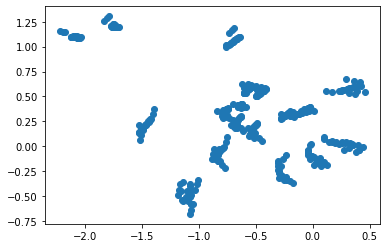

In [26]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])